In [3]:
32*32

1024

In [9]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import activations

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model

import numpy as np


In [25]:
# Load MNIST dataset
#(input_train, target_train), (input_test, target_test) = mnist.load_data()
(input_train, target_train), (input_test, target_test) = tensorflow.keras.datasets.cifar10.load_data()

In [27]:
np.unique(target_test).shape[0]

10

In [28]:
# Normalize data
#'''
input_train = input_train / 255
input_test = input_test / 255
#'''

In [29]:
print(f"input_train.shape = {input_train.shape}")
print(f"input_test.shape = {input_test.shape}")

input_train.shape = (50000, 32, 32, 3)
input_test.shape = (10000, 32, 32, 3)


In [32]:
num_classes = np.unique(target_test).shape[0]
num_classes

10

In [33]:
target_train = tensorflow.keras.utils.to_categorical(target_train, num_classes)
target_test = tensorflow.keras.utils.to_categorical(target_test, num_classes)

In [34]:
print(f"target_train.shape = {target_train.shape}")
print(f"target_test.shape = {target_test.shape}")

target_train.shape = (50000, 10)
target_test.shape = (10000, 10)


In [35]:
np.array([input_train[0]]).shape

(1, 32, 32, 3)

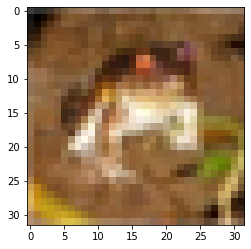

In [36]:
import matplotlib.pyplot as plt
plt.imshow(input_train[0])
plt.show()

# The architecture in code

In [37]:
# Model configuration
batch_size = 250
no_epochs = 1

In [38]:
input_train.shape

(50000, 32, 32, 3)

In [39]:
inputs = Input(input_train.shape[1:])
x = inputs

x = Conv2D(6, kernel_size=(5, 5), activation='relu', name='L1_Conv2D_1')(x)
x = MaxPooling2D(pool_size=(2, 2), name='L2_MaxPooling2D_1')(x)
x = Conv2D(10, kernel_size=(5, 5), activation='relu', name='L3_Conv2D_2')(x)
x = Flatten(name='L4_Flatten_1')(x)
x = Dense(256, activation='relu', name='L5_Dense_1')(x)

outputs = Dense(num_classes, activation='softmax', name='L7_Dense_2')(x)

model=Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
L1_Conv2D_1 (Conv2D)         (None, 28, 28, 6)         456       
_________________________________________________________________
L2_MaxPooling2D_1 (MaxPoolin (None, 14, 14, 6)         0         
_________________________________________________________________
L3_Conv2D_2 (Conv2D)         (None, 10, 10, 10)        1510      
_________________________________________________________________
L4_Flatten_1 (Flatten)       (None, 1000)              0         
_________________________________________________________________
L5_Dense_1 (Dense)           (None, 256)               256256    
_________________________________________________________________
L7_Dense_2 (Dense)           (None, 10)                2570

# Model compilation & training

In [40]:
# Compile the model
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [41]:
# Fit data to model
model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=1,
          #validation_split=validation_split,
          validation_data=(input_test, target_test)
          )

200/200 [==============================] - 38s 186ms/step - loss: 1.7357 - accuracy: 0.3715 - val_loss: 1.5313 - val_accuracy: 0.4488


In [42]:
# Generate generalization metrics 
score = model.evaluate(input_test, target_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

313/313 [==============================] - 4s 14ms/step - loss: 1.5313 - accuracy: 0.4488
Test loss: 1.5313284397125244 / Test accuracy: 0.4487999975681305


# Generating layer output visualizations

In [45]:
from keras import models
from keras import layers

In [46]:
layer_outputs = [layer.output for layer in model.layers]

In [47]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [48]:
activations = activation_model.predict(input_test)

In [49]:
print(f"Total number of layers = {len(activations)}")

Total number of layers = 7


In [50]:
print(f"Number of images fed into model = {len(activations[0])}")

Number of images fed into model = 10000


In [51]:
# Getting Activations of first layer
first_layer_activation = activations[0]

In [52]:
# shape of first layer activation
print(first_layer_activation.shape)

(10000, 32, 32, 3)


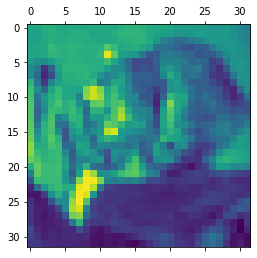

In [53]:
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 0], cmap ='viridis') # 1st channel

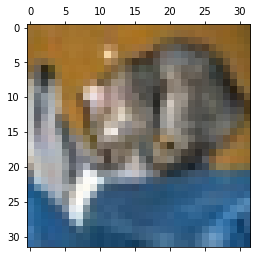

In [54]:
plt.matshow(first_layer_activation[0, :, :, :], cmap ='viridis')

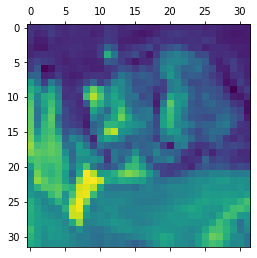

In [55]:
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 2], cmap ='viridis')  # 3rd channel

In [56]:
layer_names = []
  
for layer in model.layers:
  layer_names.append(layer.name)
print(layer_names)

['input_4', 'L1_Conv2D_1', 'L2_MaxPooling2D_1', 'L3_Conv2D_2', 'L4_Flatten_1', 'L5_Dense_1', 'L7_Dense_2']


In [57]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(10000, 28, 28, 6)


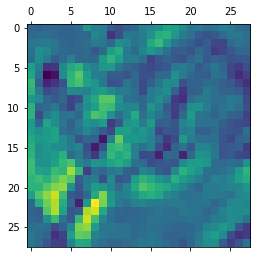

In [58]:
plt.matshow(second_layer_activation[0, :, :, 4], cmap ='viridis') # 1st channel

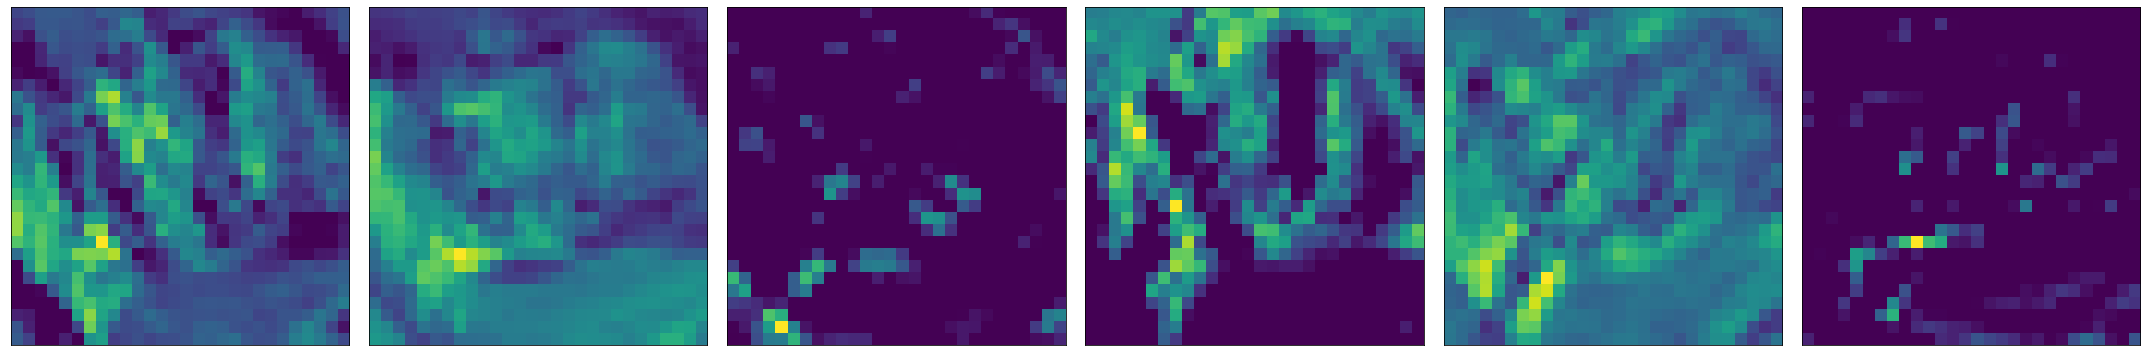

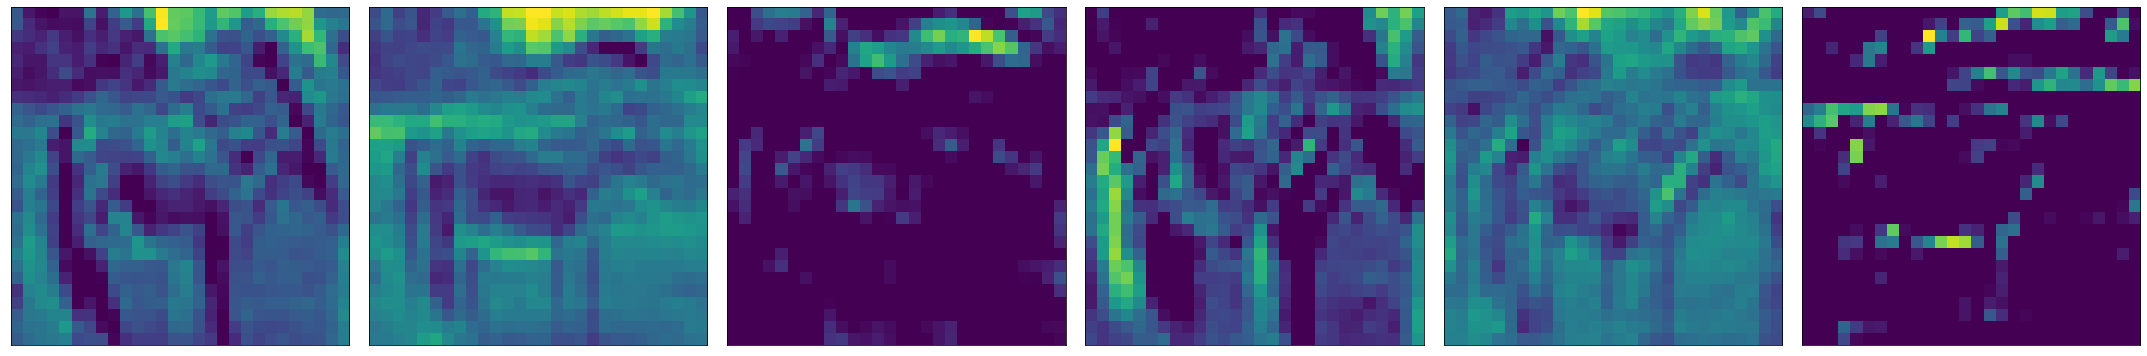

In [59]:
sub_fig_num_rows = 1
sub_fig_num_cols = 6
fig_heigth = 30
fig_width = 5

img_index = 0
fig, axes = plt.subplots(sub_fig_num_rows,sub_fig_num_cols, figsize=(fig_heigth,fig_width))
for i,ax in enumerate(axes.flat):
    ax.imshow(second_layer_activation[img_index, :, :, i], cmap ='viridis')
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

img_index = 9999
fig, axes = plt.subplots(sub_fig_num_rows,sub_fig_num_cols, figsize=(fig_heigth,fig_width))
for i,ax in enumerate(axes.flat):
    ax.imshow(second_layer_activation[img_index, :, :, i], cmap ='viridis')
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

In [60]:
second_layer_activation.shape

(10000, 28, 28, 6)

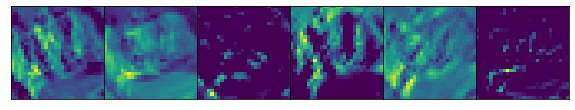

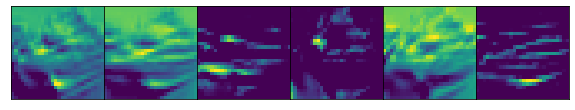

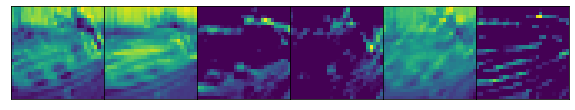

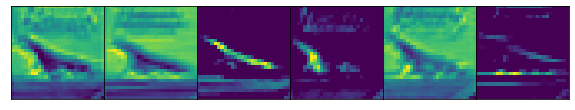

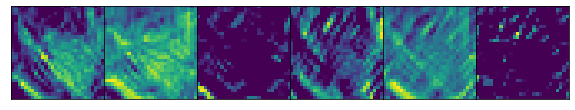

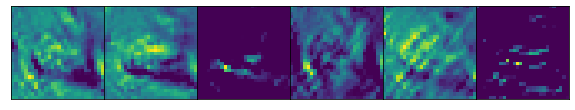

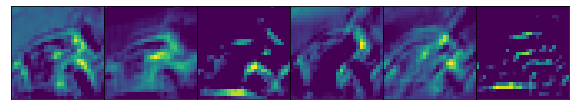

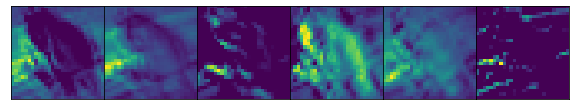

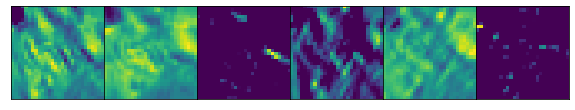

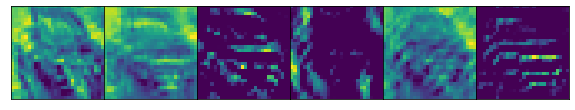

In [64]:
sub_fig_num_rows = 1
sub_fig_num_cols = 6
fig_heigth = 10
fig_width = 3

#img_index = 0
for img_index in range(10):
    #ax.set_xlabel(f"image {str(img_index)}")
    fig, axes = plt.subplots(sub_fig_num_rows,sub_fig_num_cols, figsize=(fig_heigth,fig_width))
    #ax.set_xlabel(f"image {str(img_index)}")
    for i,ax in enumerate(axes.flat):
        ax.imshow(second_layer_activation[img_index, :, :, i], cmap ='viridis')
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.set_xlabel(f"image {str(i+1)}")
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
    plt.subplots_adjust(wspace=0, hspace=0)

In [119]:
activations[1].shape[1:]

(28, 28, 6)

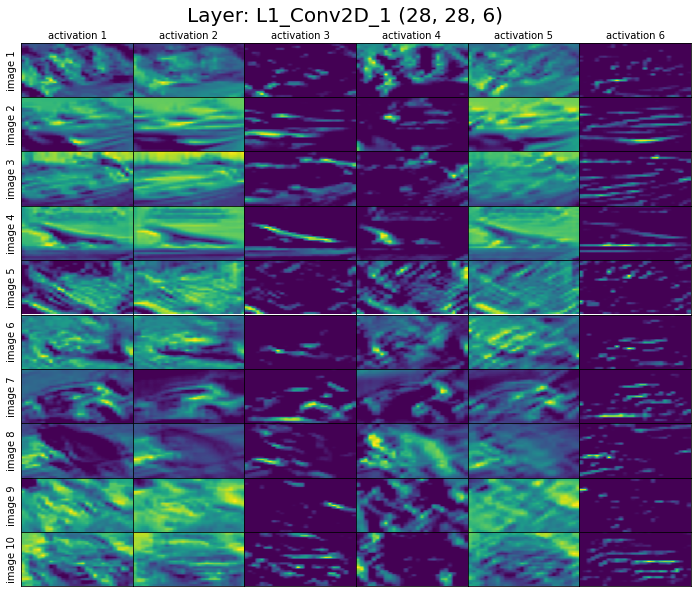

In [127]:
sub_fig_num_rows = 10
sub_fig_num_cols = 6
fig_heigth = 10
fig_width = 12

fig, axes = plt.subplots(sub_fig_num_rows,sub_fig_num_cols, figsize=(fig_width,fig_heigth))
plt.suptitle(f"Layer: {layer_names[1]} {str(activations[1].shape[1:])}", fontsize=20, y=0.93)

for i,ax in enumerate(axes.flat):
    row = i//sub_fig_num_cols
    col = i%sub_fig_num_cols
    
    ax.imshow(second_layer_activation[row, :, :, col], cmap ='viridis')
    ax.set_xticks([])
    ax.set_yticks([])
    if col == 0:
        ax.set_ylabel(f"image {str(row+1)}")
    if row == 0:
        ax.set_xlabel(f"activation {str(col+1)}")
        ax.xaxis.set_label_position('top') 
    ax.set_aspect('auto')
#fig.tight_layout()    
plt.subplots_adjust(wspace=0, hspace=0)